# The Change in the Suicide Rate around the World

Author: Xinyi Song

Course Final Project, UC Irvine, Math 10, Summer 2023

## Introduction

My final topic is to explore the changes in suicide probability from 2000 to 2021 in different countries worldwide. My data include the probability of suicide among women and men and the probability of suicide at different ages. As age increases, does the suicide rate increase? As the years go by, will the changes in the times affect the suicide rate? And will there be differences in the number of suicides based on gender? At the same time, are there any differences or influences between different regions and countries? I will follow those kinds of questions to discuss and study.

## Import the Data

In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Explore the Data

In [2]:
df_pre = pd.read_csv("combined_processed_data.csv")
df_pre = df_pre.dropna()
df_pre.shape

(9538, 27)

The code shows that the data frame contains 9538 rows and 27 columns, which shows a huge dataset.

In [3]:
df_pre.head()


Region Name Country Name  Year     Sex  0 Year  1-4 Years  5-9 Years  \
0      Africa   Cabo Verde  1980  Female     0.0        0.0        0.0   
1      Africa   Cabo Verde  1980    Male     0.0        0.0        0.0   
2      Africa   Cabo Verde  2011  Female     0.0        0.0        0.0   
3      Africa   Cabo Verde  2011    Male     0.0        0.0        0.0   
4      Africa        Egypt  1965  Female     0.0        0.0        0.0   

   10-14 Years  15-19 Years  20-24 Years  ...  60-64 Years  65-69 Years  \
0          0.0          1.0          0.0  ...          0.0          0.0   
1          0.0          2.0          0.0  ...          0.0          1.0   
2          0.0          0.0          1.0  ...          0.0          0.0   
3          3.0          1.0          4.0  ...          0.0          0.0   
4          0.0          6.0          1.0  ...          2.0          0.0   

   70-74 Years  75-79 Years  80-84 Years  85+ Years  Unknown Age  \
0          0.0          0.0          0.0        0.0          0.0   
1          0.0          1.0          0.0        0.0          0.0   
2          0.0          0.0          0.0        0.0          0.0   
3          1.0          0.0          1.0        1.0          0.0   
4          0.0          0.0          0.0        0.0          0.0   

   No of Suicides  Percentage of cause-specific deaths out of total deaths  \
0             1.0                                           0.227273         
1             6.0                                           0.983156         
2             5.0                                           1.161273         
3            37.0                                           3.804557         
4            11.0                                           0.026743         

   Death rate per 100 000 population  
0                           0.000000  
1                           0.000000  
2                           2.395998  
3                          28.024735  
4                           0.074515  

[5 rows x 27 columns]

The data frame shown above, mainly includes different country classifications, different gender classifications and different age classifications.

Since we only investigate data start from the year 2000, our df should be:

In [4]:
df = df_pre[df_pre["Year"] >= 2000]

## Compare with the data

In [5]:
region = df["Region Name"].value_counts()
region = region.index.values
region

array(['Europe', 'Asia', 'Central and South America',
       'North America and the Caribbean', 'Africa', 'Oceania'],
      dtype=object)

In [6]:
len(region)

6

The number and the names of regions have been shown above.

Comparison of number of suicide between different regions is valuable because people can figure out the main reason of suicide through this.

In [7]:
No_of_Country = []
for name in region:
    No_of_Country.append([name, len(df[df["Region Name"] == name]["Country Name"].value_counts().index.values)])
No_of_Country

[['Europe', 39],
 ['Asia', 32],
 ['Central and South America', 19],
 ['North America and the Caribbean', 17],
 ['Africa', 7],
 ['Oceania', 3]]

We see that the every region's number of countries is totally different, so that only analyze the sum of suicides in different is unreasonable. Thus, the following is my way.

In [8]:
mean_list = []
for name in region:
    mean = df[df["Region Name"] == name]["No of Suicides"].sum()/(len(df[df["Region Name"] == name]["Country Name"].value_counts().index.values))
    mean_list.append(int(mean))
mean_list

[56121, 37236, 30004, 54867, 1902, 21513]

In this way, we get the mean of number of suicides per country in each region since 2000. Now , we make a pie chart.

In [9]:
df_region = pd.DataFrame(No_of_Country, columns=["Region Name", "No of Country"])
df_region["Average No of Suicides per Countries"] = mean_list
df_region

Region Name  No of Country  \
0                           Europe             39   
1                             Asia             32   
2        Central and South America             19   
3  North America and the Caribbean             17   
4                           Africa              7   
5                          Oceania              3   

   Average No of Suicides per Countries  
0                                 56121  
1                                 37236  
2                                 30004  
3                                 54867  
4                                  1902  
5                                 21513

In [10]:
region_c = alt.Chart(df_region).mark_arc().encode(
    theta = "Average No of Suicides per Countries",
    color = "Region Name:N",
    tooltip = ["Region Name", "No of Country", "Average No of Suicides per Countries"]
)

region_c

alt.Chart(...)

Through this Pie chart, I can find Europe has the highest suicide rate among those six regions. However, it is questionable why Europe has the highest suicide rate although it has 39 countries total. Therefore, to find the reason, I use a bar chart to help me find the relationship more clearly. 

In [11]:
c3 = alt.Chart(df).mark_bar().encode(
    x = "Country Name",
    y = "No of Suicides",
    tooltip = ["Country Name","No of Suicides"]
)
c3

alt.Chart(...)

In [12]:
c3 = alt.Chart(df.loc[df["Region Name"]=="Europe"]).mark_bar().encode(
    x = "Country Name",
    y = "No of Suicides",
    tooltip = ["Country Name","No of Suicides"]
)
c3

alt.Chart(...)

After discovering this problem again, I used a box plot to prove my findings. During these 70 years, the suicide rate of the Russian Federation in countries was much higher than that of other countries. From Google, I found some reasons for the high rate of suicides in Russia. https://www.themoscowtimes.com/2019/09/11/russia-ranks-3rd-in-suicide-rates-globally-un-says-a67235.This chart proves why Europe has the highest suicide rate. Because we can find an outlier in the data on the Suicide rate which is the Russian Federation. Russian Federation has the highest suicide rate about 38574 persons which is much higher than other countries. Therefore, the mean of Europe must be very huge. 

The project's explored data for Europe has been shown above. Next, the focus is the comparison between these European countries' rate of suicide.

In [13]:
df_male = df.loc[df["Sex"] == "Male"]
c1 = alt.Chart(df_male).mark_line().encode(
    x = alt.X("Year", scale=alt.Scale(domain=[2000, 2025])),
    y = "No of Suicides",
    color = "Country Name",
    tooltip = ["Country Name","No of Suicides","Year","Sex"]
)
c1


alt.Chart(...)

I filtered the data from the graph for all men from the world and used a scatter plot to show the change in male suicide rates as a function of the year. Through the scatter plot, I found that the suicide rate in the country Russian Federation has undergone tremendous changes between 2000 and 2021. The entire change has shown a parabolic trend. Since the 21st century, the suicide rate in this country has shown a significant decline year by year. In contrast, the suicide rates in other countries have been relatively stable over the past 70 years, without significant increases or decreases.

In [14]:
df_female = df.loc[df["Sex"] == "Female"]
df_female
c2 = alt.Chart(df_female).mark_line().encode(
    x = alt.X("Year", scale=alt.Scale(domain=[2000, 2025])),
    y = "No of Suicides",
    color = "Country Name",
    tooltip = ["Country Name","No of Suicides","Year","Sex"]
)
c2

alt.Chart(...)

In this graph, I selected the number of suicides among women across all the World. By comparing the images with those of men, I found that the number of women who committed suicide was much less than the number of men who committed suicide. The range of y_axis in male images is 0-55000, while the range of y_axis in female images is 0-11000. It can be seen that the suicide rate of men is much higher than that of women. At the same time, the suicide rate of women in the Russian Federation shows almost the same trend as that of men.

## Regression Line

Back to the Pie chart, we can find the country with the second highest number of suicides is the United States of America. it is interesting that although North America and the Caribbean only contain 17 countries, the average number of suicides per country in North America and the Caribbean just be a little smaller than that in Europe which contains 39 countries. From the line chart, we can see not only females chart but also males have a line that continues to increase. This line is the United States of America. To learn more details about the situation in America and describe the data. Therefore, I divide the sex to compare and predict.

Because of sex classification, we only consider males now.

In [15]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df_male[["Percentage of cause-specific deaths out of total deaths"]], df_male["Death rate per 100 000 population"])

LinearRegression()

In [16]:
reg.coef_

array([2.59073596])

Coefficient means the slope of the relationship between those two percentages of male. Because the coefficient is larger than 1, we can say that the percentage of cause-specific deaths out of total deaths has a strong and positive relationship with the death rate per 100,000 population. 

In [17]:
reg.intercept_

5.205274358850296

Intercept means the average value of the death rate when the percentage of cause-specific deaths out of total deaths equal to zero. 

In [18]:
df_male["RegPred"] = reg.predict(df_male[["Percentage of cause-specific deaths out of total deaths"]])
df_male

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Region Name Country Name  Year   Sex  0 Year  1-4 Years  5-9 Years  \
3         Africa   Cabo Verde  2011  Male     0.0        0.0        0.0   
25        Africa        Egypt  2000  Male     0.0        0.0        1.0   
27        Africa        Egypt  2001  Male     0.0        0.0        0.0   
29        Africa        Egypt  2002  Male     0.0        0.0        1.0   
31        Africa        Egypt  2003  Male     0.0        0.0        2.0   
...          ...          ...   ...   ...     ...        ...        ...   
9529     Oceania  New Zealand  2012  Male     0.0        0.0        1.0   
9531     Oceania  New Zealand  2013  Male     0.0        0.0        0.0   
9533     Oceania  New Zealand  2014  Male     0.0        0.0        0.0   
9535     Oceania  New Zealand  2015  Male     0.0        0.0        0.0   
9537     Oceania  New Zealand  2016  Male     0.0        0.0        0.0   

      10-14 Years  15-19 Years  20-24 Years  ...  65-69 Years  70-74 Years  \
3             3.0          1.0          4.0  ...          0.0          1.0   
25            1.0          6.0         10.0  ...          0.0          0.0   
27            1.0          3.0          7.0  ...          0.0          1.0   
29            1.0          3.0          2.0  ...          0.0          0.0   
31            0.0          8.0          6.0  ...          0.0          0.0   
...           ...          ...          ...  ...          ...          ...   
9529          6.0         53.0         54.0  ...          8.0         11.0   
9531          0.0         31.0         44.0  ...          9.0         13.0   
9533          2.0         27.0         41.0  ...         13.0         14.0   
9535          5.0         32.0         38.0  ...         14.0          7.0   
9537          5.0         34.0         52.0  ...         18.0          5.0   

      75-79 Years  80-84 Years  85+ Years  Unknown Age  No of Suicides  \
3             0.0          1.0        1.0          0.0            37.0   
25            1.0          1.0        0.0          0.0            36.0   
27            0.0          0.0        0.0          0.0            29.0   
29            0.0          0.0        0.0          0.0            20.0   
31            0.0          0.0        0.0          0.0            28.0   
...           ...          ...        ...          ...             ...   
9529         13.0          5.0        6.0          0.0           404.0   
9531          7.0          8.0       11.0          0.0           366.0   
9533          4.0          8.0       10.0          0.0           379.0   
9535         13.0          9.0        6.0          0.0           386.0   
9537         10.0          8.0       10.0          0.0           416.0   

      Percentage of cause-specific deaths out of total deaths  \
3                                              3.804557         
25                                             0.042945         
27                                             0.035008         
29                                             0.026089         
31                                             0.035410         
...                                                 ...         
9529                                          11.974347         
9531                                           9.348242         
9533                                          10.703106         
9535                                          11.143815         
9537                                          11.974208         

      Death rate per 100 000 population    RegPred  
3                             28.024735  15.061877  
25                             0.142809   5.316535  
27                             0.075325   5.295971  
29                             0.040406   5.272864  
31                             0.051552   5.297013  
...                                 ...        ...  
9529                          17.320801  36.227646  
9531                          17.160208  29.424101  
9533                

In order to confirm the accuracy of this set of data, we created a new column: "Regpred" to predict the death rate per 100,000 population.

In [19]:
predicted_dr = alt.Chart(df_male).mark_line(color = "red").encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "RegPred",
)
death_rate = alt.Chart(df_male).mark_circle().encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "Death rate per 100 000 population",
    color = "Country Name:N",
    tooltip = ["Country Name","No of Suicides","Year"]
)
predicted_dr+death_rate

alt.LayerChart(...)

From the graph, we get that the correlation between the Percentage of cause-specific deaths out of total deaths and the death rate per 100,000 population is positive.

Now, let's find out the USA's condition regarding how prediction is accurate.  I use the data from the USA to draw the regression line. From this line, I found that it has a strong and positive relationship between the percentage of cause-special deaths rate and the total death rate.  It means that there are a lot of American people death because of special causes every year.

In [20]:
df_USA_male = df_male[df_male["Country Name"]=="United States of America"]
df_USA_male
USA_predicted_dr = alt.Chart(df_USA_male).mark_line(color = "red").encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "RegPred",
)
USA_death_rate = alt.Chart(df_USA_male).mark_circle().encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "Death rate per 100 000 population",
    color = "Country Name:N",
    tooltip = ["Country Name","No of Suicides","Year"]
)
USA_predicted_dr+USA_death_rate

alt.LayerChart(...)

From the above graph, the predicted value is very close to the real value, which implies that USA literally follow a strong correlation between the two variables mentioned above. Thus, the predictor variable have effects on the death rate in USA. But, do other countries also basically follow the regression? Let's find out and try Japan and Australia:

In [21]:
df_Japan_male = df_male[df_male["Country Name"]=="Japan"]
Japan_predicted_dr = alt.Chart(df_Japan_male).mark_line(color = "red").encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "RegPred",
)
Japan_death_rate = alt.Chart(df_Japan_male).mark_circle().encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "Death rate per 100 000 population",
    color = "Country Name:N",
    tooltip = ["Country Name","No of Suicides","Year"]
)
df_Australia_male = df_male[df_male["Country Name"]=="Australia"]
Australia_predicted_dr = alt.Chart(df_Australia_male).mark_line(color = "red").encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "RegPred",
)
Australia_death_rate = alt.Chart(df_Australia_male).mark_circle().encode(
    x = "Percentage of cause-specific deaths out of total deaths",
    y = "Death rate per 100 000 population",
    color = "Country Name:N",
    tooltip = ["Country Name","No of Suicides","Year"]
)

Japan_predicted_dr+Japan_death_rate | Australia_predicted_dr+Australia_death_rate

alt.HConcatChart(...)

However, different from the USA, the predicted values for both countries are above and far away from the real death rate. Why USA follow the regression of the world's trend, but others don't? This again represents that the relationship between these two variables is stronger in USA. This situation shows that compared to other countries, the possibility of specific-cause deaths is higher than in other countries.

In fact, there are a lot of specific-cause deaths because of suicide. Therefore, I use the data about no of suicides and the total deaths number to create the graph. we can see that there exists a strong positive relationship between them. It means my guess is true. 

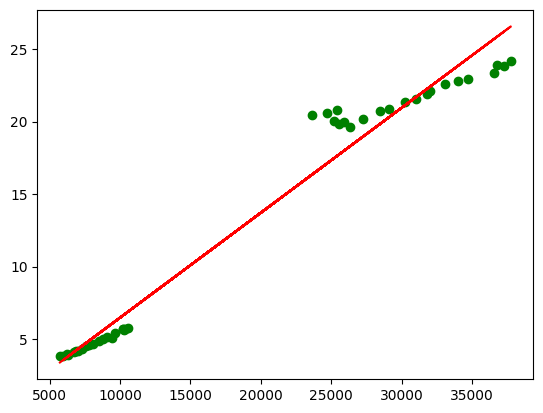

In [22]:
import matplotlib.pyplot as plt
x = df[df["Country Name"] == "United States of America"]["No of Suicides"]
y = df[df["Country Name"] == "United States of America"]["Death rate per 100 000 population"]
plt.plot(x, y, 'o', color='green')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

## Another way of Regression 

Now I find a new way what is out of math 10 to describe the regression relationship.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 12.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


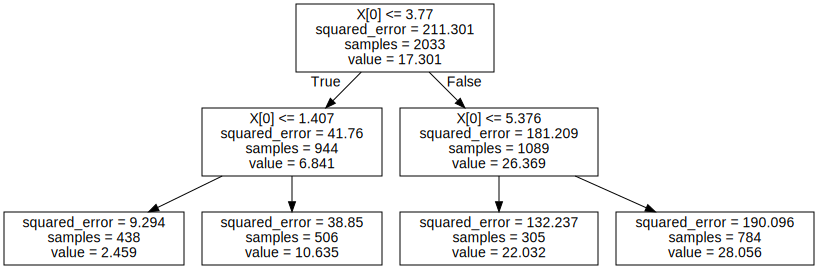

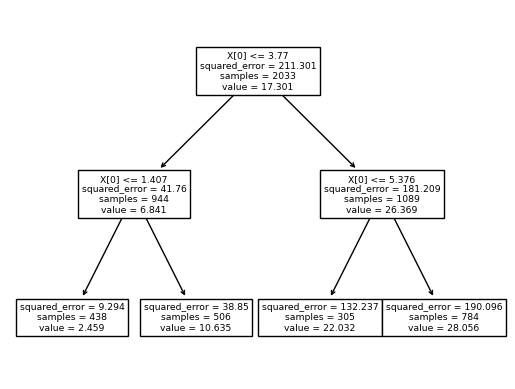

In [23]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(df_male[["Percentage of cause-specific deaths out of total deaths"]], df_male["Death rate per 100 000 population"])
df_male["TreeReg"] = clf.predict(df_male[["Percentage of cause-specific deaths out of total deaths"]])
tree.plot_tree(clf)
!pip install graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## New factor

In [24]:
total = df[['1-4 Years', '5-9 Years','10-14 Years','15-19 Years','20-24 Years','25-29 Years','30-34 Years','35-39 Years','40-44 Years','45-49 Years','50-54 Years','55-59 Years','60-64 Years','65-69 Years','70-74 Years','75-79 Years','80-84 Years','85+ Years']].sum()
age_suicide = pd.DataFrame(total.index.values, columns=["Age"])
total_list = list(total)
age_suicide["No of Suicides"] = total_list
age_suicide

Age  No of Suicides
0     1-4 Years            23.0
1     5-9 Years          1217.0
2   10-14 Years         41085.0
3   15-19 Years        221396.0
4   20-24 Years        366894.0
5   25-29 Years        394338.0
6   30-34 Years        401508.0
7   35-39 Years        417572.0
8   40-44 Years        448499.0
9   45-49 Years        471833.0
10  50-54 Years        463268.0
11  55-59 Years        398712.0
12  60-64 Years        320643.0
13  65-69 Years        268526.0
14  70-74 Years        239181.0
15  75-79 Years        206215.0
16  80-84 Years        153422.0
17    85+ Years        137094.0

Here I create a new dataframe that contain the sum of no of suicides in different age period. Then I use bar chart to compare.

In [25]:
c4 = alt.Chart(age_suicide).mark_bar().encode(
    x = "Age",
    y = "No of Suicides",
    tooltip = ["Age","No of Suicides"]
)
c4

alt.Chart(...)

I found that the total age of the table increased from low to high, and then decreased again after the age of 50. In other words, suicide is the most serious among the young and middle-aged groups.

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

In my project, I first sorted and cleared all the data. Second, I compared all regions in the data using pie charts. I compared it by averaging the number of suicides in each region. From this graph, I find that Europe has the highest average suicide rate, and I use the bar chart to find that Europe has a very high suicide rate due to the existence of an outlier. At the same time, I used two current charts to compare the differences in suicide rates between men and women in the 21st century, and my conclusion is that the overall range of suicide rates for men is greater than for women. Secondly, through the pie chart, I also have questions about the suicide rate in North America, which is very high in a region where there are not many countries. The reason lies in the United States. This time I used regression line to explore the relationship between suicide rates in the United States. Through regression line, I found that there is a strong relationship between the accidental death rate and the total death rate in the United States, which indicates that many people die in the United States every year. Have stronger relationships than other countries. I also plotted the relationship between the number of suicides and the total number of deaths, again showing a very strong linear relationship, which confirmed my conjecture. Finally, I added up the number of suicides for each age group to create a new table. I used the bar chart to find the relationship between age and suicide rate. I found that the total age of the table increased from low to high, and then decreased again after the age of 50. In other words, suicide is the most serious among the young and middle-aged groups.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://deepnote.com/workspace/cindy-dccb-b6b53858-de19-49d2-96a7-80da802784ca/project/Project-Template-Duplicate-ec452f81-2254-4088-9884-f91d4945de7a/%2Fcombined_processed_data.csv

* List any other references that you found helpful.

https://scikit-learn.org/stable/modules/tree.htmlt

https://www.geeksforgeeks.org/ml-linear-regression-vs-logistic-regression/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=521792d1-cf7d-43df-8878-b1c279a4070c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>